In [1]:
import os, subprocess, math, cv2
import numpy as np
import pandas as pd
import itertools 
%load_ext autoreload ## updates scripts
%autoreload 2

In [2]:
import json, os, cv2
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm import tqdm
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors
import glob
import h5py

import sys
sys.path.insert(0, 'C:/Users/nlab/Documents/GitHub/obstacle_avoidance')
from src.base import BaseInput
from src.topcam import Topcam
from src.utils.auxiliary import flatten_series, find_index_in_list
from src.utils.path import find
from utils.base_functions import format_frames,flatten_column,list_columns



Loading DLC 2.2.3...


In [3]:
df = pd.read_hdf(r"D:\obstacle_avoidance\recordings\101422\J20LT\oa\raw_J20LT_101422_oa.h5")

(0.0, 72.0)

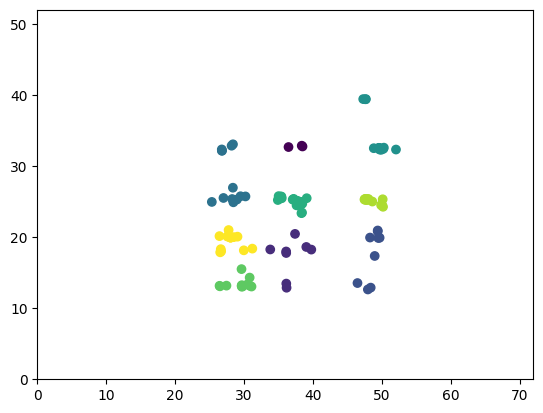

In [4]:
kmeans_input = np.vstack([df['gt_obstacle_cen_x_cm'].values, df['gt_obstacle_cen_y_cm'].values])

kmeans_input = np.transpose(kmeans_input)

labels = KMeans(n_clusters=9).fit(kmeans_input).labels_
df['obstacle_cluster'] = labels



plt.scatter(df['gt_obstacle_cen_x_cm'], df['gt_obstacle_cen_y_cm'], c=labels)
plt.ylim([0,52]); plt.xlim([0, 72])

In [5]:
frames = format_frames(r"D:\obstacle_avoidance\recordings\101422\J20LT\oa\101422_J20LT_control_Rig2_oa_top1.avi",.25)

100%|██████████| 29212/29212 [00:29<00:00, 985.81it/s] 


In [6]:
frames.shape

(29212, 135, 180)

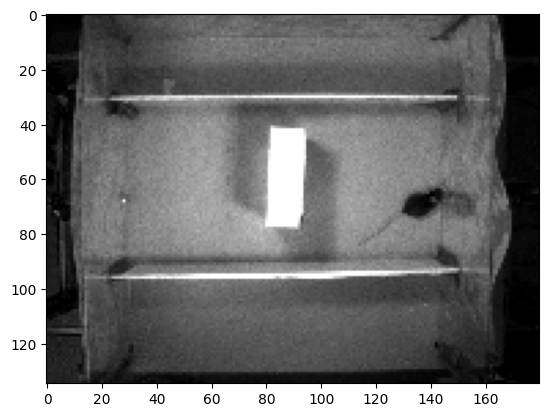

In [7]:
fig, axes = plt.subplots()
axes.imshow(frames[0], cmap='gray') 

In [25]:
frames[0]

array([[ 2,  2,  2, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 5,  4,  3, ...,  0,  0,  0],
       ...,
       [32, 38, 33, ...,  0,  0,  0],
       [32, 37, 33, ...,  0,  0,  0],
       [31, 36, 32, ...,  0,  0,  0]], dtype=uint8)

In [ ]:
def check_tracking(self,vid_path,num_trials):
    

In [27]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wd

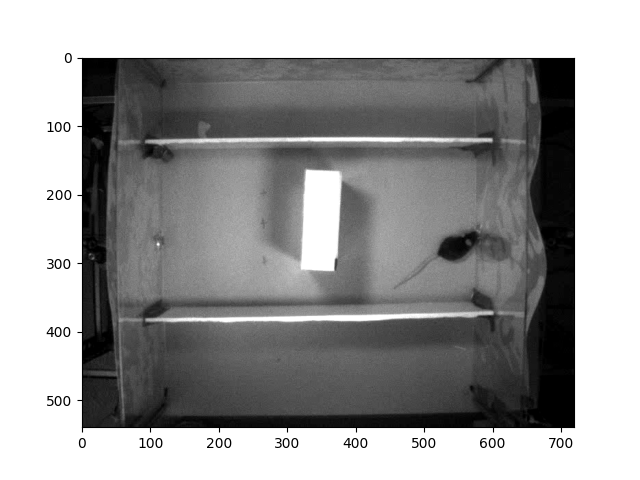

In [37]:
fig, axes = plt.subplots()
axes.imshow(frames[0], cmap='gray') #displaying the first image
slider=wd.IntSlider(
    value=0, #intial image index
    min=0,
    max=frames.shape[0]-1, #video shouldn't play more than time limit
)
play_button=wd.Play(
    value=0, #intial image index
    min=0,
    max=frames.shape[0]-1, #video shouldn't play more than time limit
    step=1,
    interval=200, #referesh interval in ms
    description="Press play",
)
wd.jslink((play_button,"value"),(slider,"value"))

def slider_update(change):
    axes.imshow(
        frames[change.new], 
        cmap='gray', 
        origin='lower', 
        vmax=frames.max(), 
        vmin=frames.min()
    )
    fig.canvas.draw_idle()
    plt.suptitle(f'Time: {slider.value}')
slider.observe(slider_update, "value")
out=wd.Output()
app=wd.VBox([wd.HBox([play_button,slider]),out])
display(app)

In [34]:
slider=wd.IntSlider(
    value=0, #intial image index
    min=0,
    max=frames.shape[0]-1, #video shouldn't play more than time limit
)
play_button=wd.Play(
    value=0, #intial image index
    min=0,
    max=frames.shape[0]-1, #video shouldn't play more than time limit
    step=1,
    interval=200, #referesh interval in ms
    description="Press play",
)
wd.jslink((play_button,"value"),(slider,"value"))

def slider_update(change):
    axes.imshow(
        frames[change.new], 
        cmap='jet', 
        origin='lower', 
        vmax=frames.max(), 
        vmin=frames.min()
    )
    fig.canvas.draw_idle()
    plt.suptitle(f'Time: {slider.value}')
slider.observe(slider_update, "value")
out=wd.Output()
app=wd.VBox([wd.HBox([play_button,slider]),out])
display(app)

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

img = [] # some array of images
frames = [] # for storing the generated images
fig = plt.figure()
for i in xrange(6):
    frames.append([plt.imshow(img[i], cmap=cm.Greys_r,animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)
# ani.save('movie.mp4')
plt.show()

NameError: name 'xrange' is not defined

<Figure size 640x480 with 0 Axes>